# H. Wickham’s ggplot2 Vignette

In [2]:
housing <- read.csv("/Rgraphics/DataSets/landdata-states.csv")
head(housing[1:5])

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

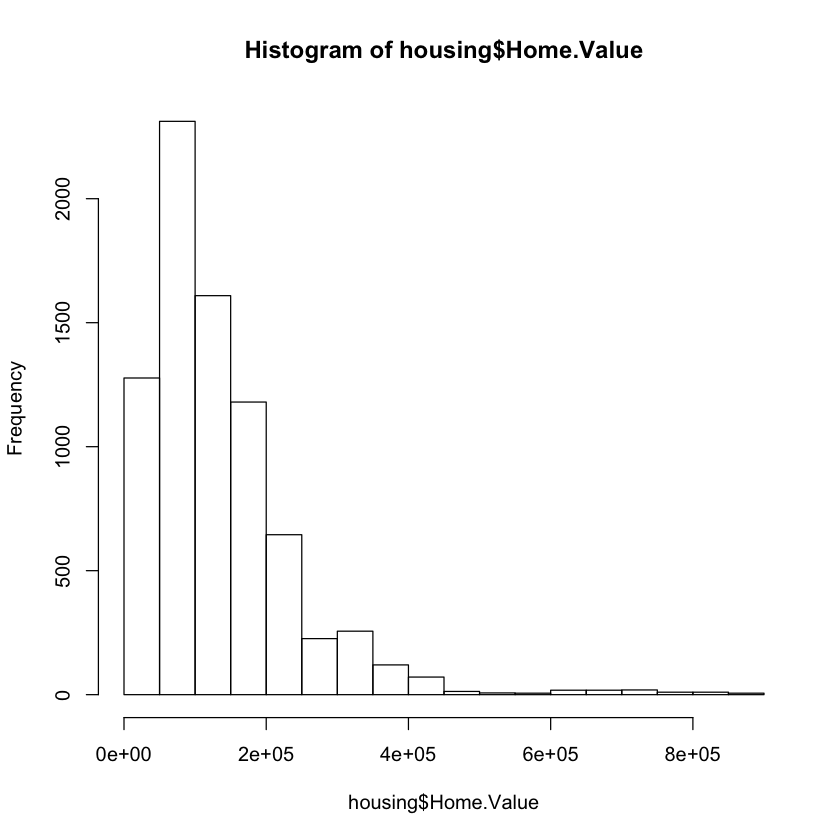

In [3]:
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


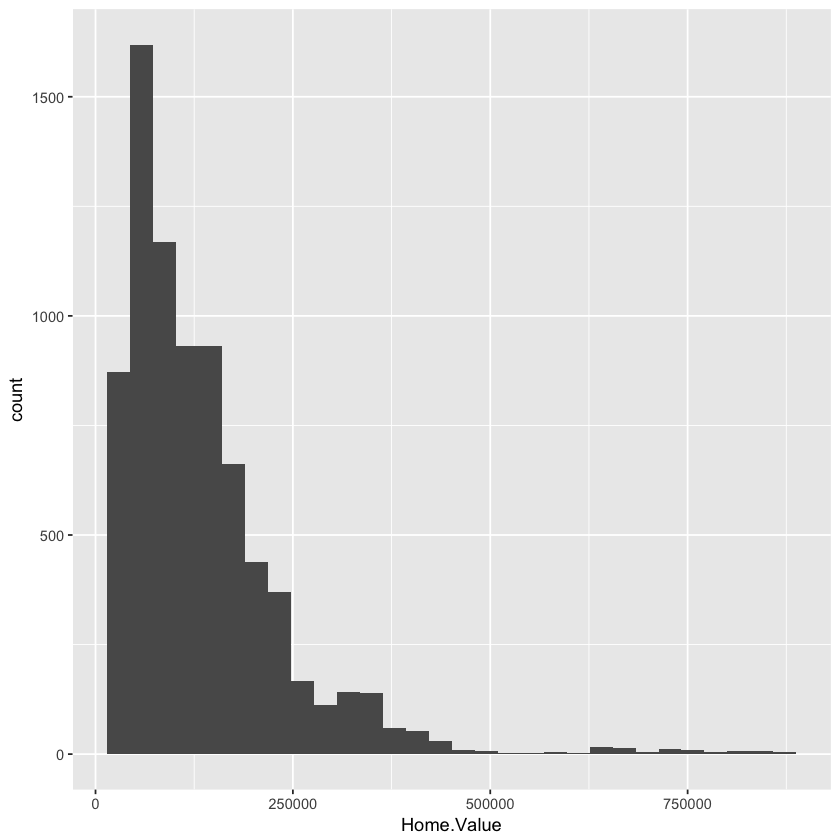

In [4]:
library(ggplot2)
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

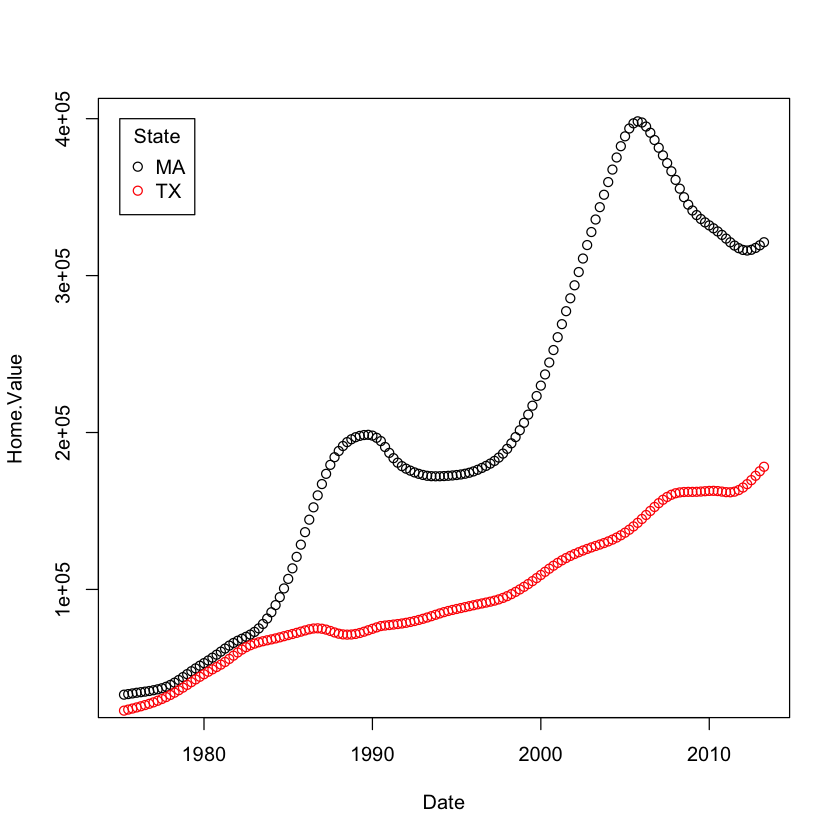

In [5]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

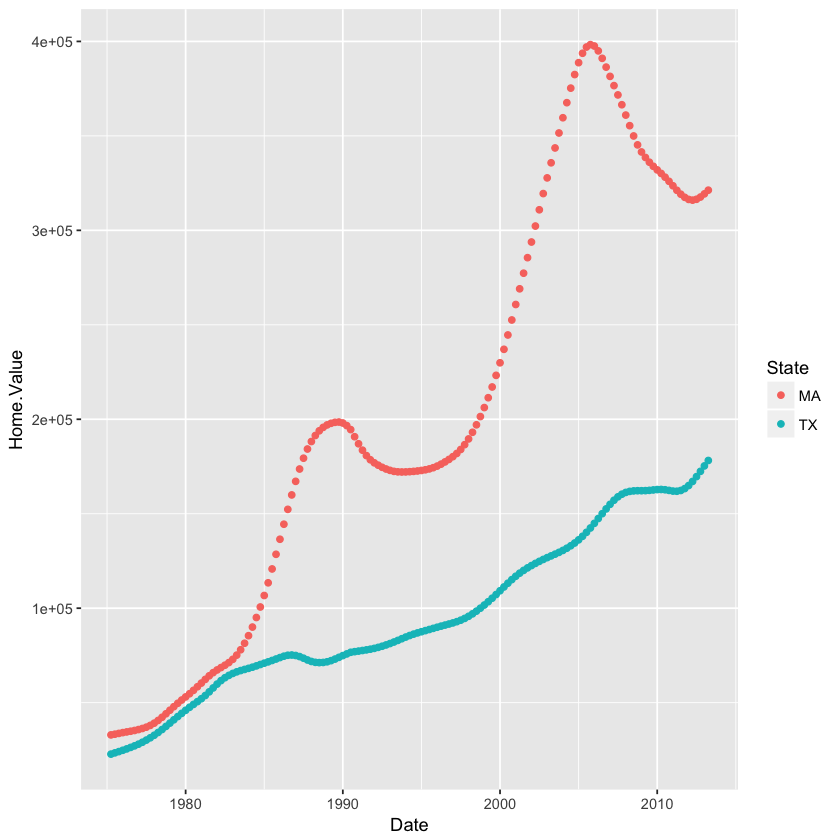

In [6]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

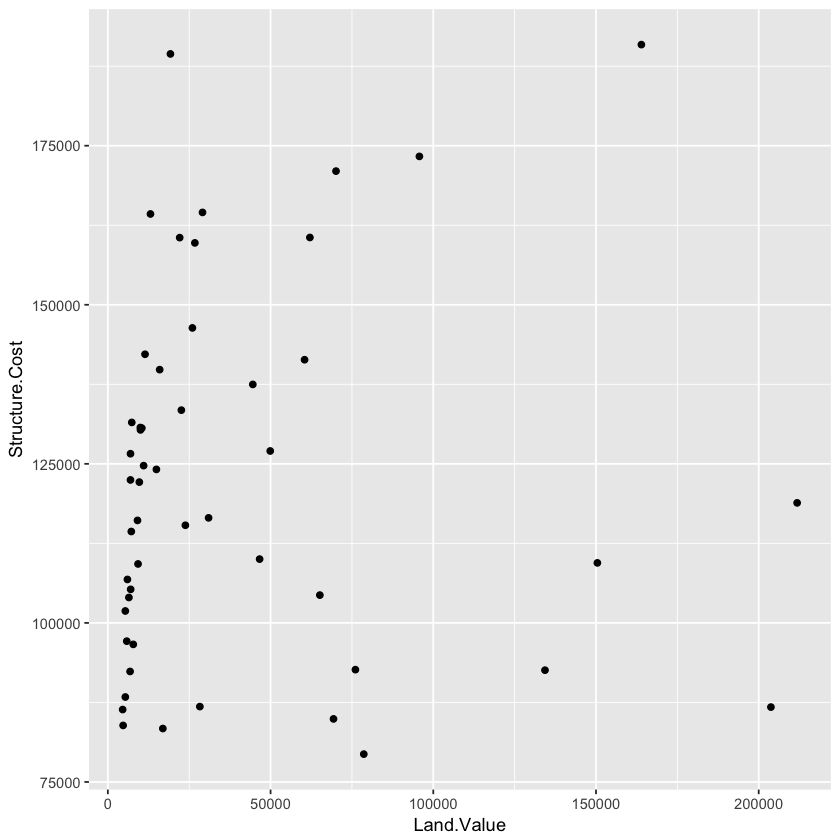

In [7]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

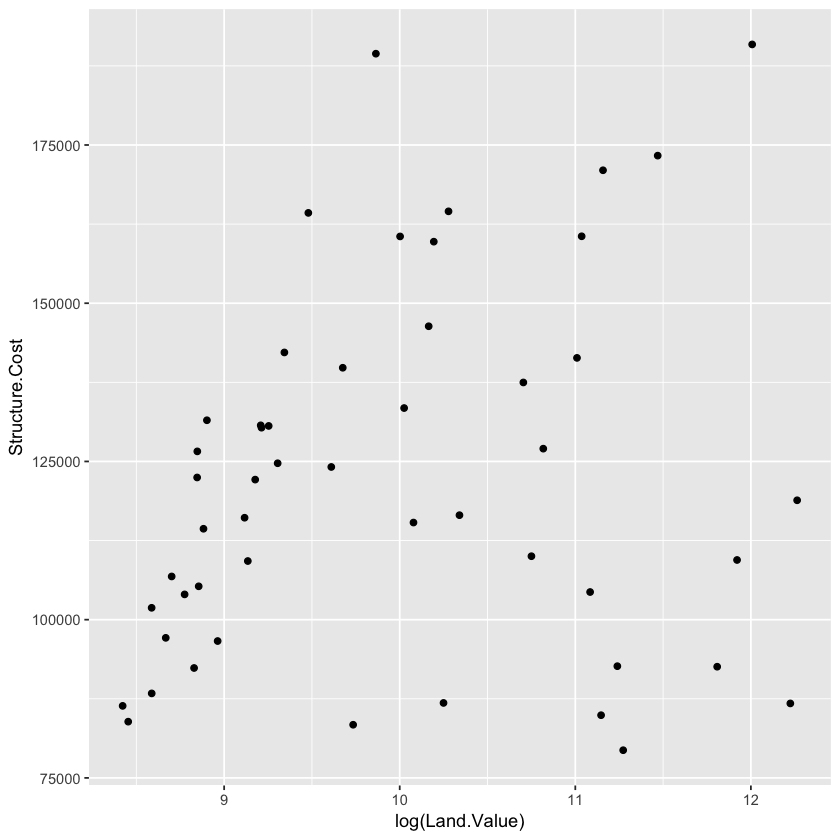

In [8]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

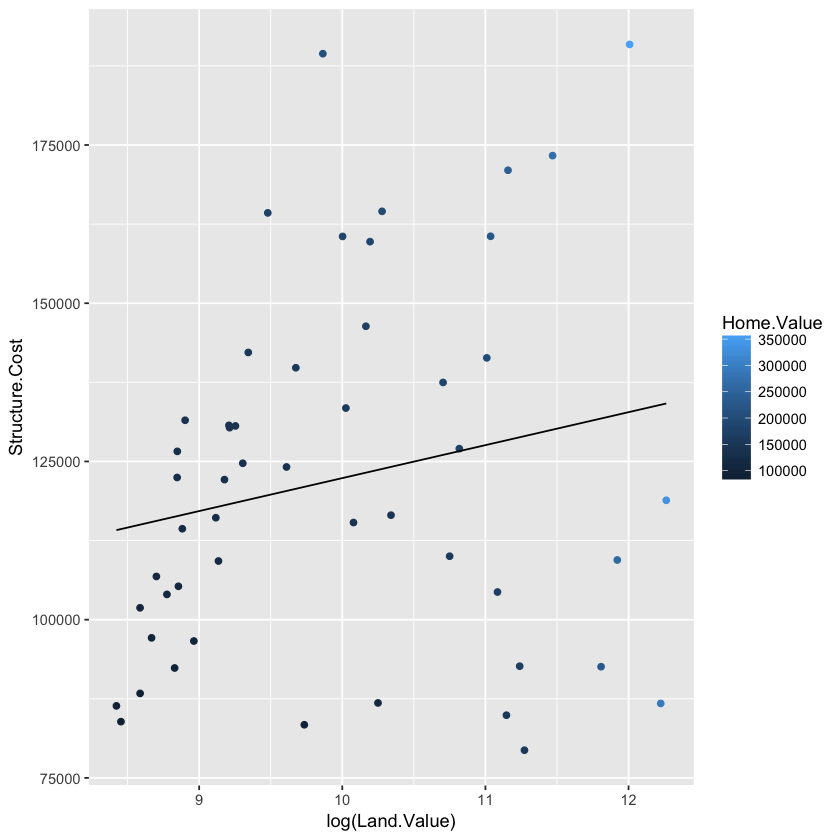

In [9]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

`geom_smooth()` using method = 'loess'


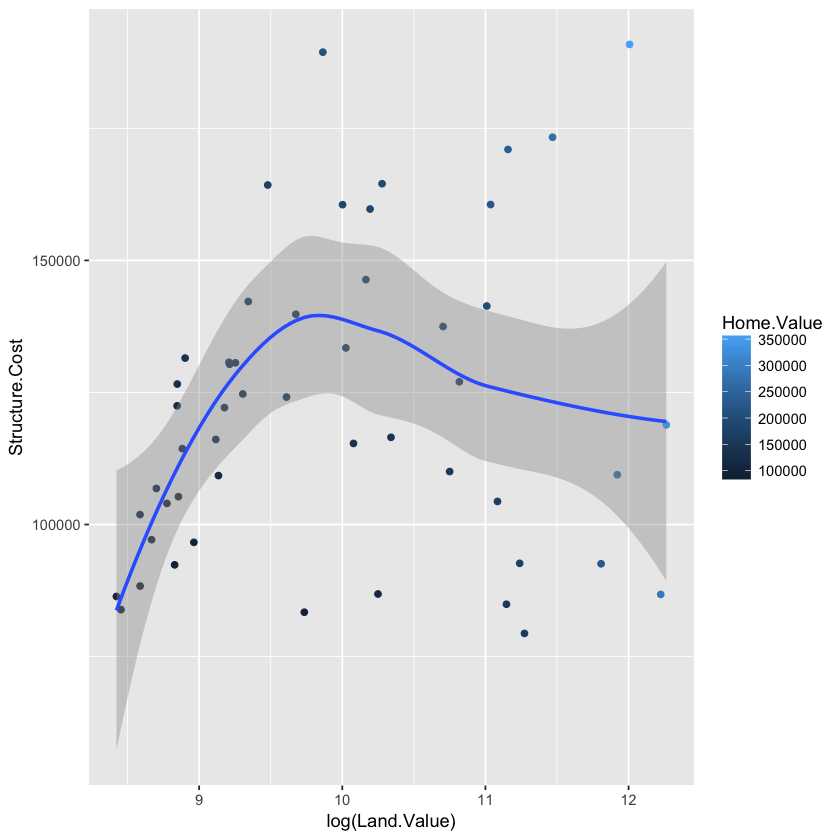

In [10]:
p1 + geom_point(aes(color = Home.Value)) + geom_smooth()

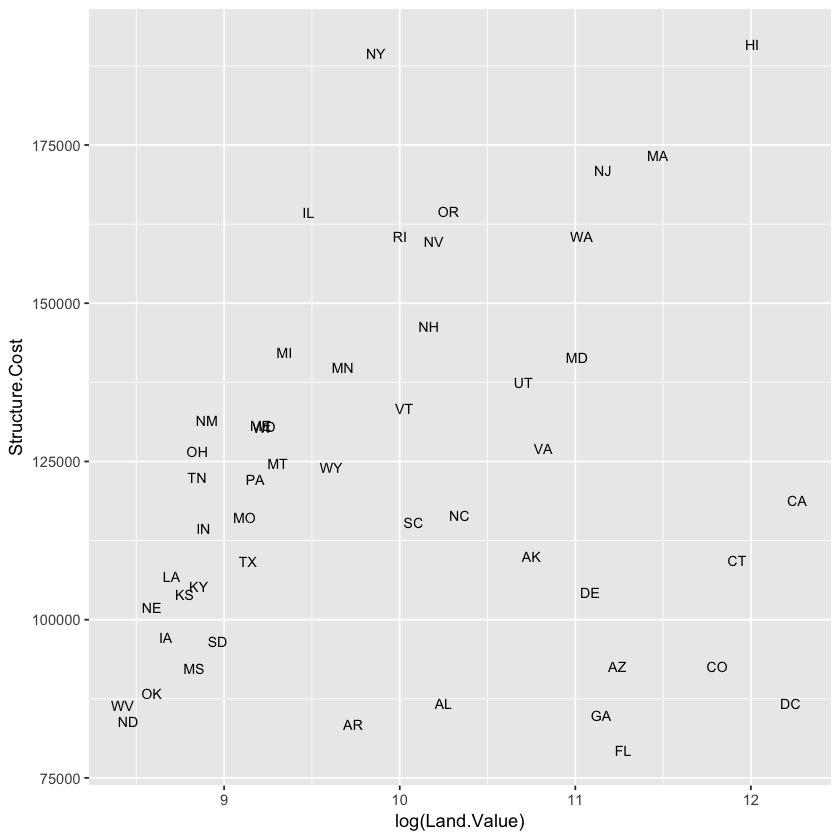

In [11]:
p1 + geom_text(aes(label=State), size = 3)

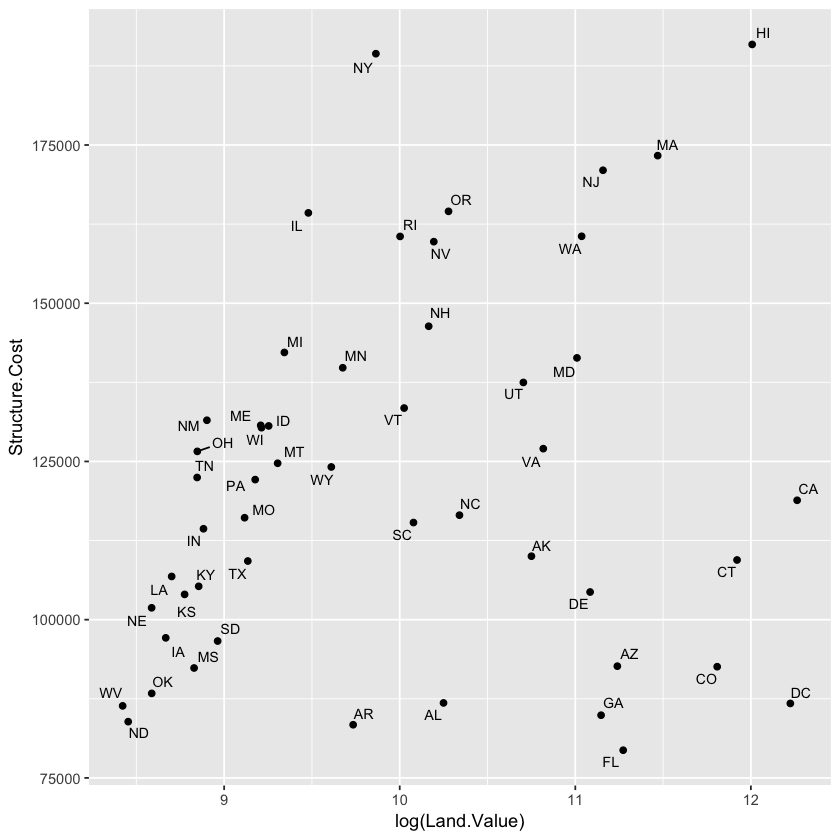

In [12]:
#install.packages("ggrepel")
library("ggrepel")
p1 + geom_point() + geom_text_repel(aes(label=State), size = 3)

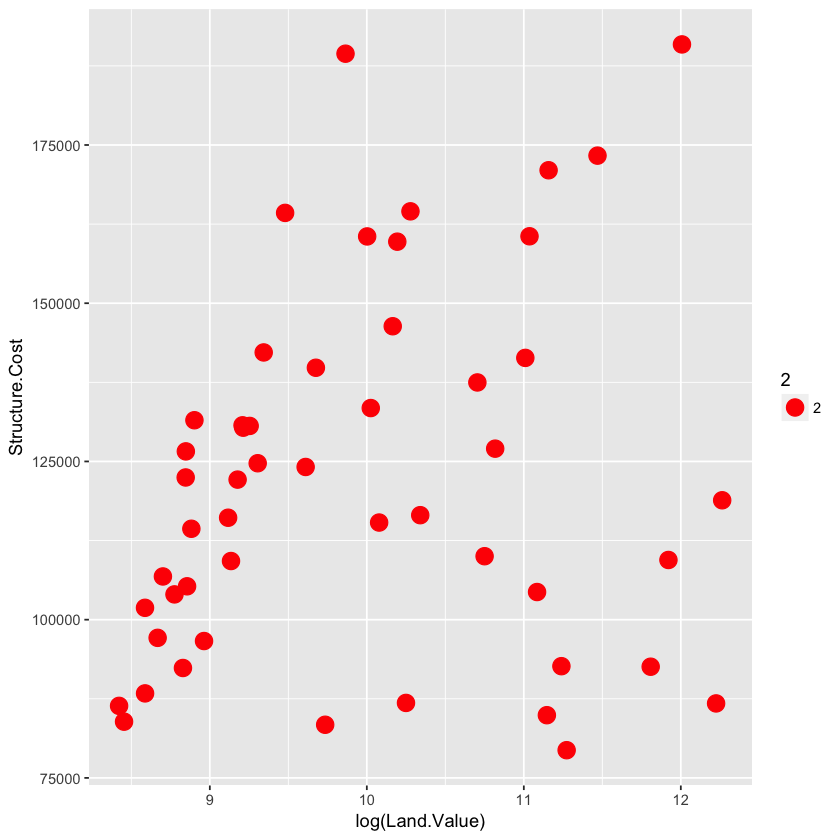

In [13]:
p1 + geom_point(aes(size = 2),# incorrect! 2 is not a variable
                color="red") # this is fine -- all points red

Warning message:
“Removed 1 rows containing missing values (geom_point).”

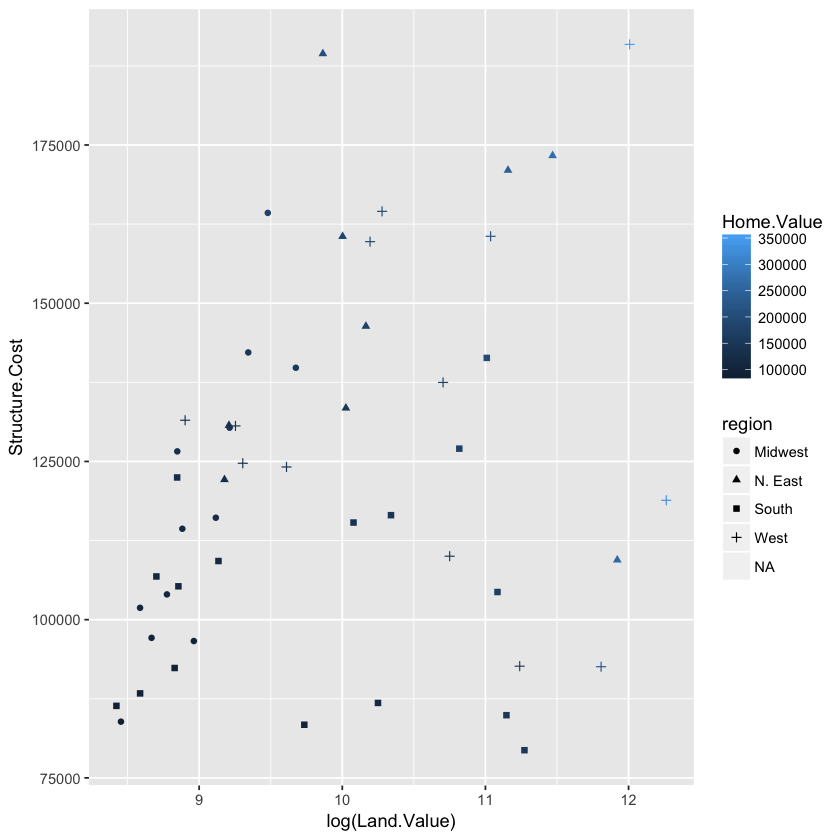

In [14]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

X Country     HDI.Rank HDI   CPI Region           
1 1 Afghanistan 172      0.398 1.5 Asia Pacific     
2 2 Albania      70      0.739 3.1 East EU Cemt Asia
3 3 Algeria      96      0.698 2.9 MENA             
4 4 Angola      148      0.486 2.0 SSA              
5 5 Argentina    45      0.797 3.0 Americas         
6 6 Armenia      86      0.716 2.6 East EU Cemt Asia

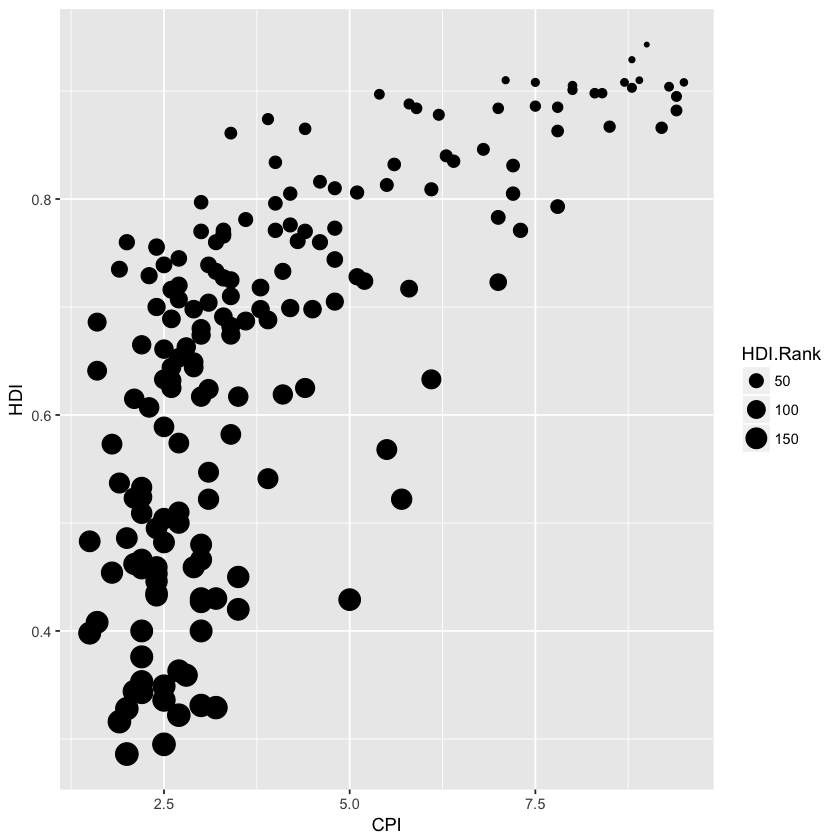

In [15]:
dat <- read.csv("/Rgraphics/dataSets/EconomistData.csv")
head(dat)

ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


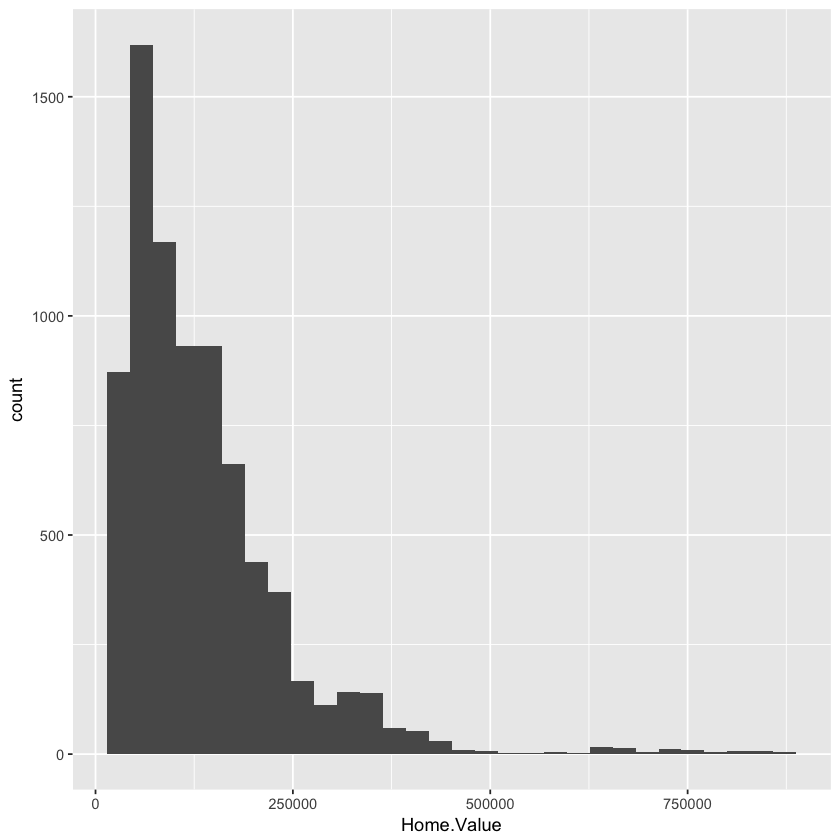

In [16]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

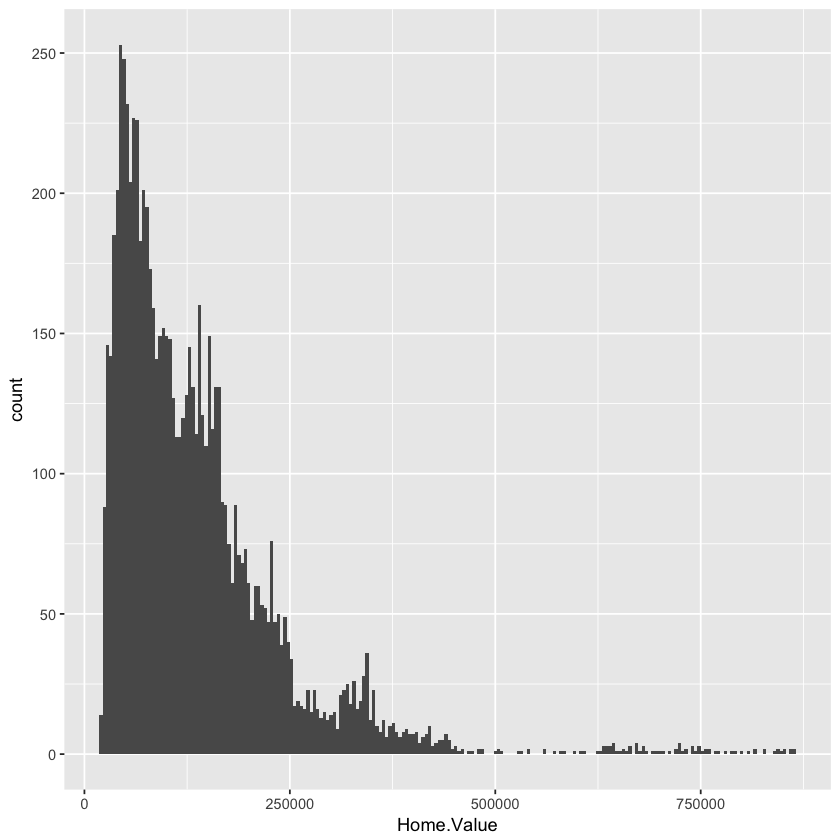

In [17]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

In [18]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

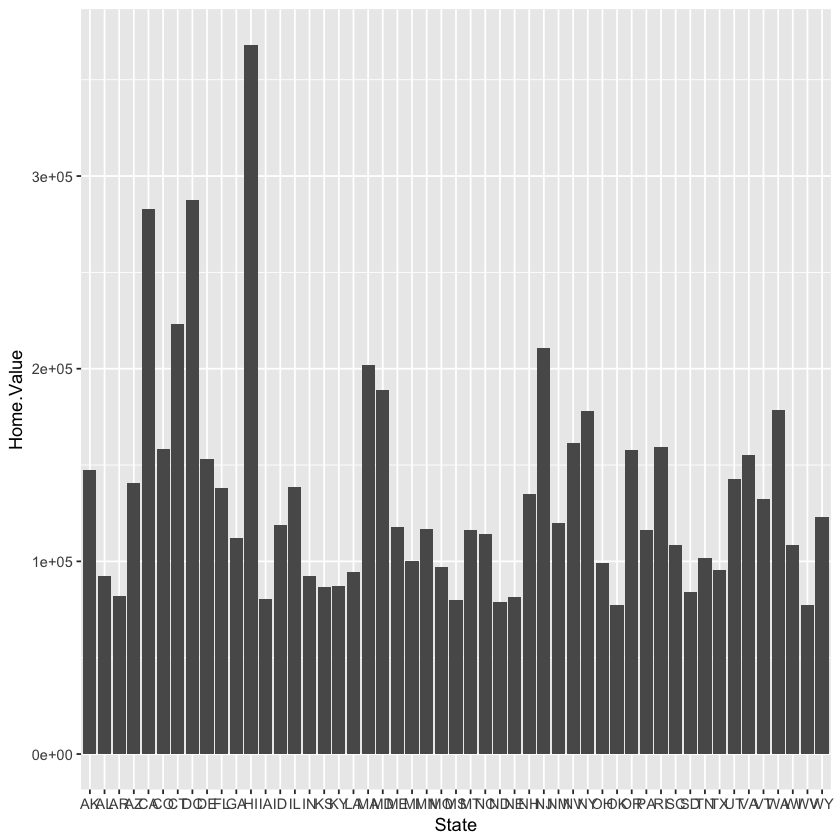

In [19]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")

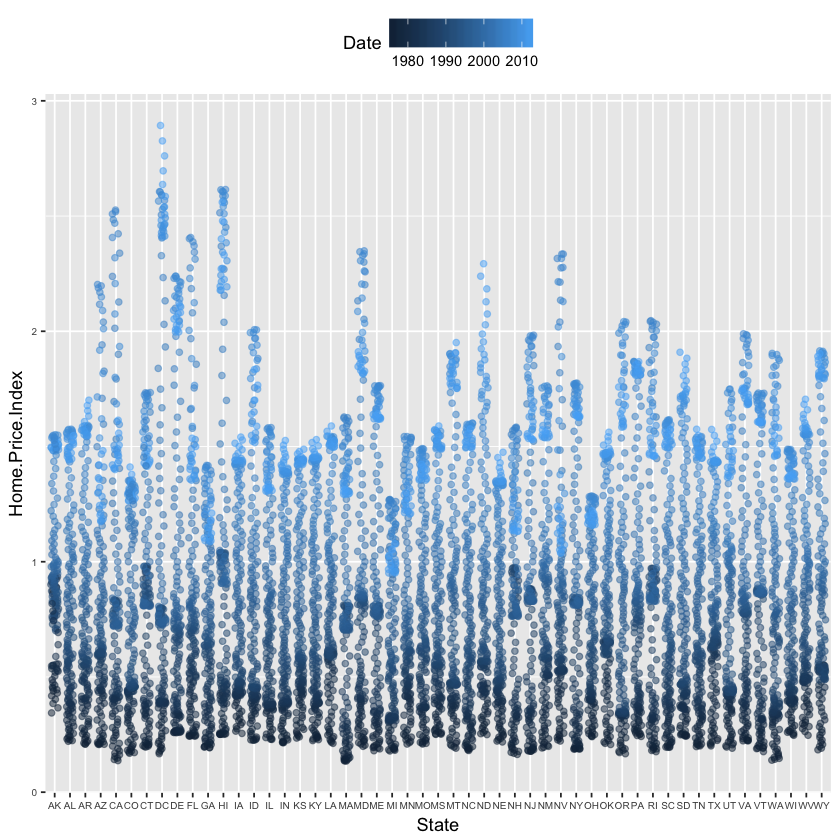

In [20]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

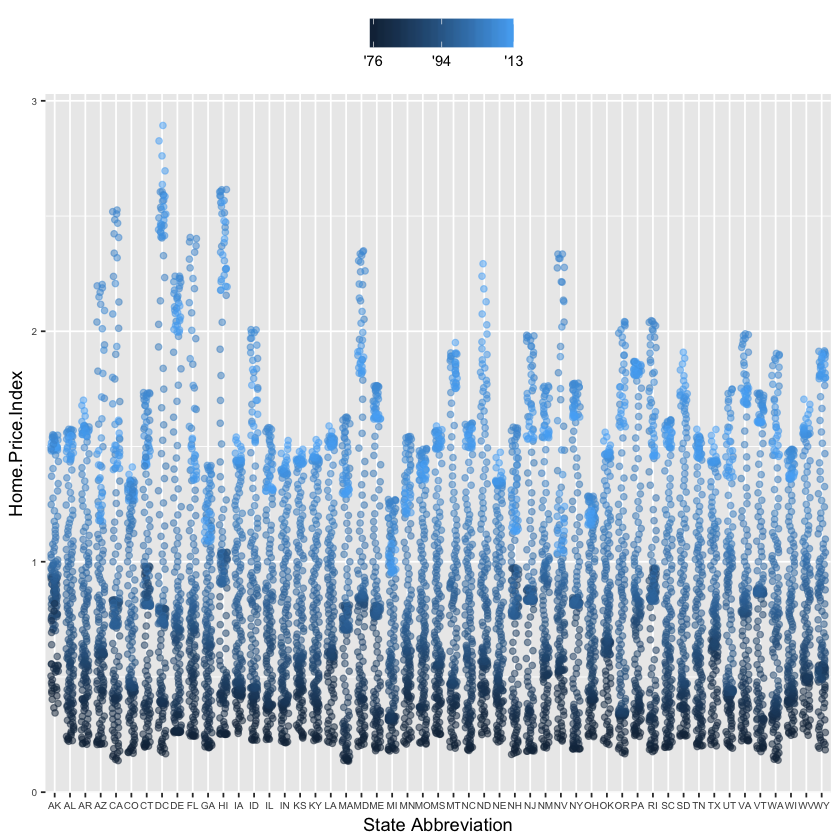

In [21]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

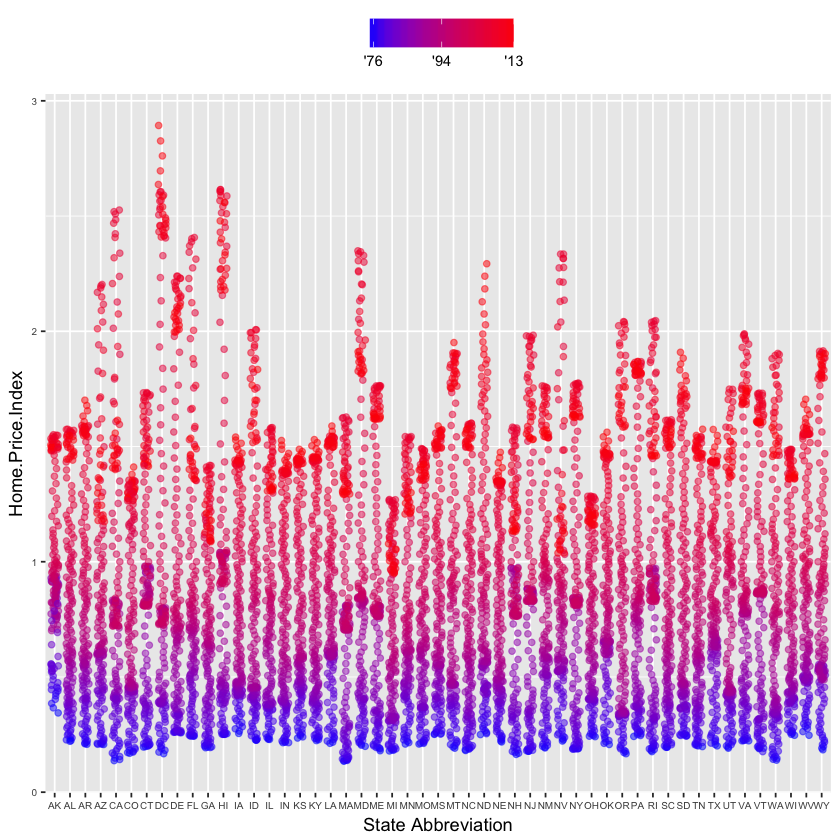

In [22]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

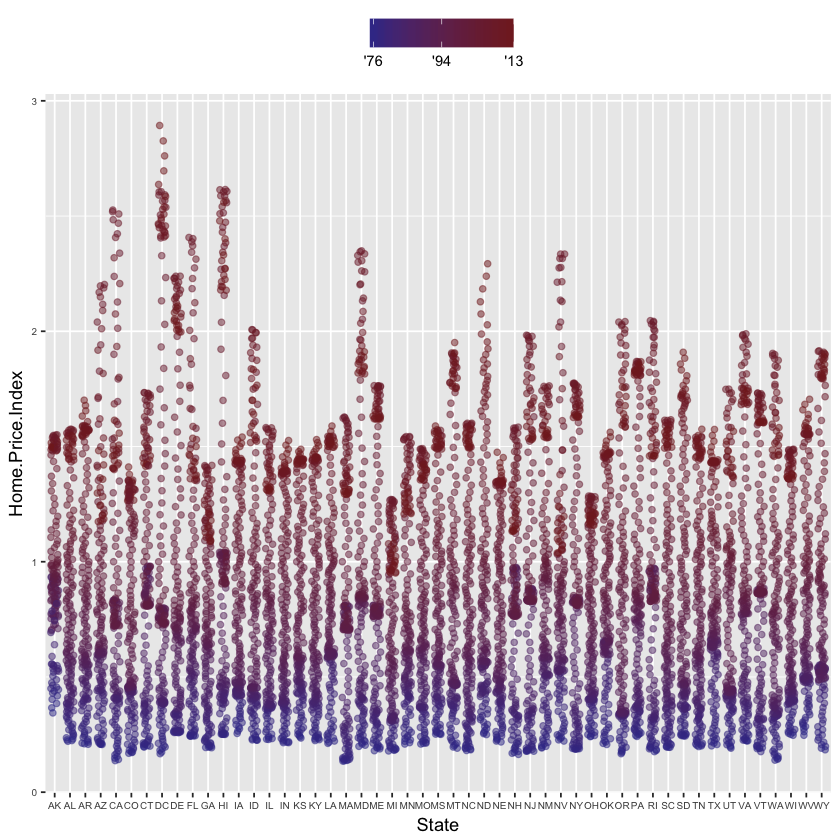

In [23]:
library('scales')

p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = muted("blue"), high = muted("red"))

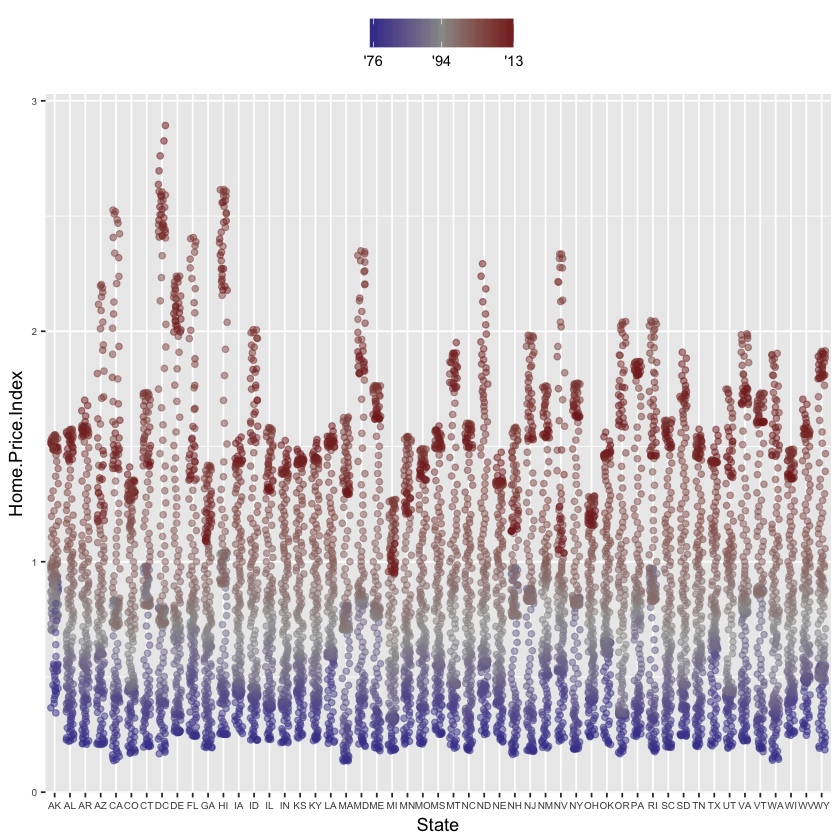

In [24]:
p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = muted("blue"),
                        high = muted("red"),
                        mid = "gray60",
                        midpoint = 1994)

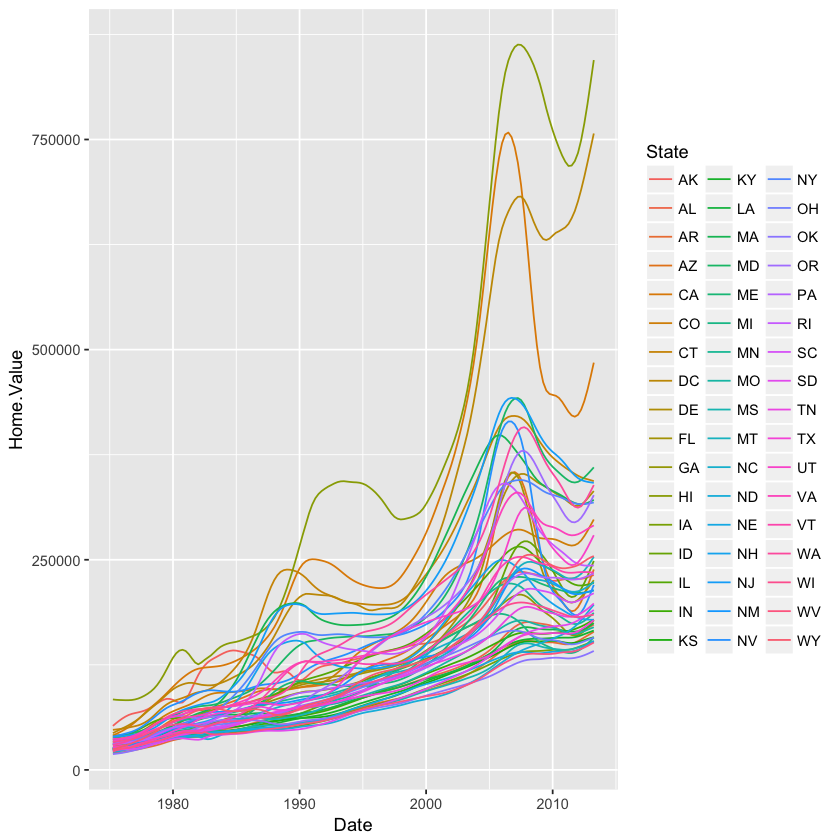

In [25]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

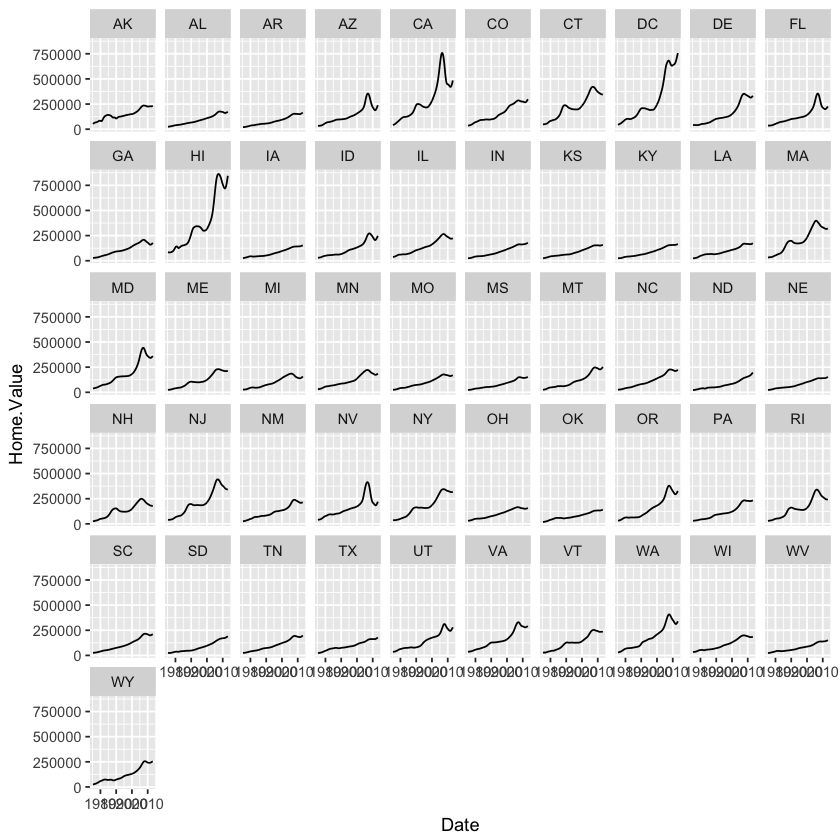

In [26]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

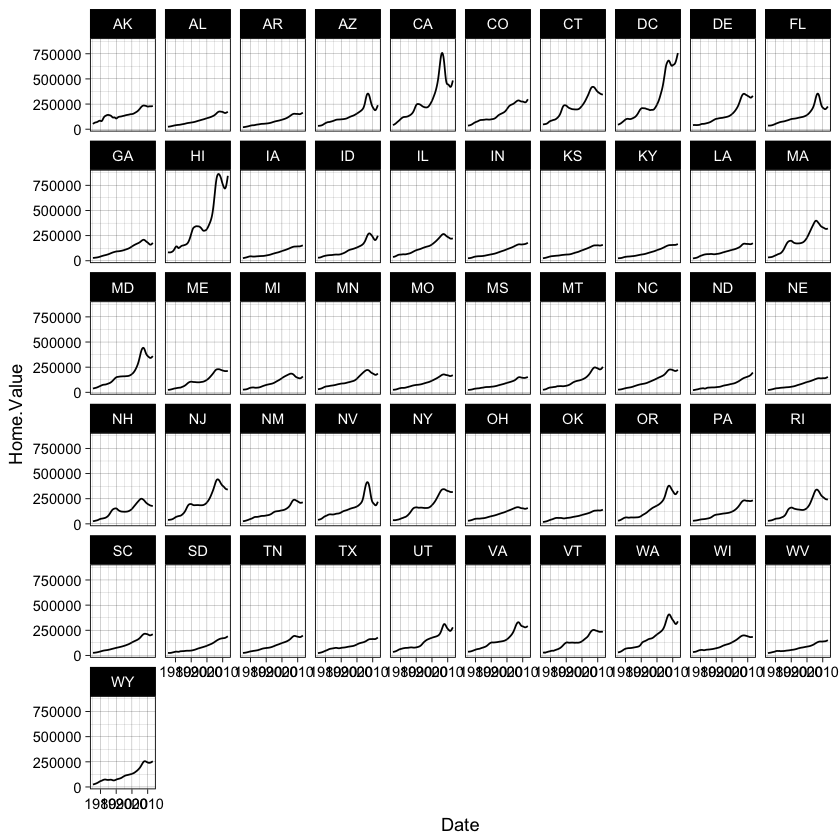

In [27]:
p5 + theme_linedraw()

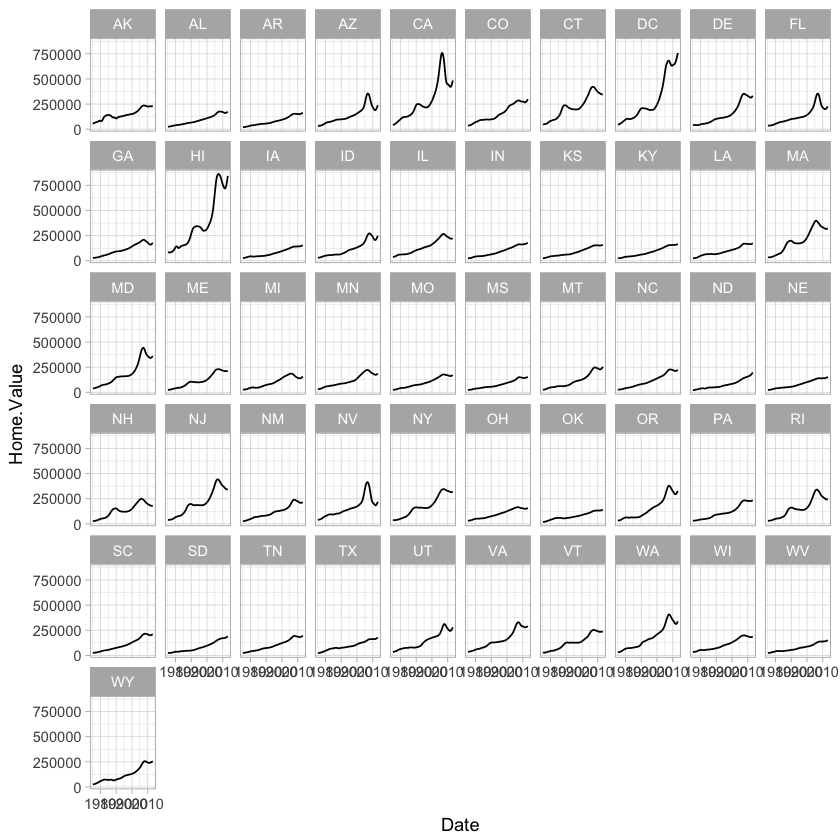

In [28]:
p5 + theme_light()

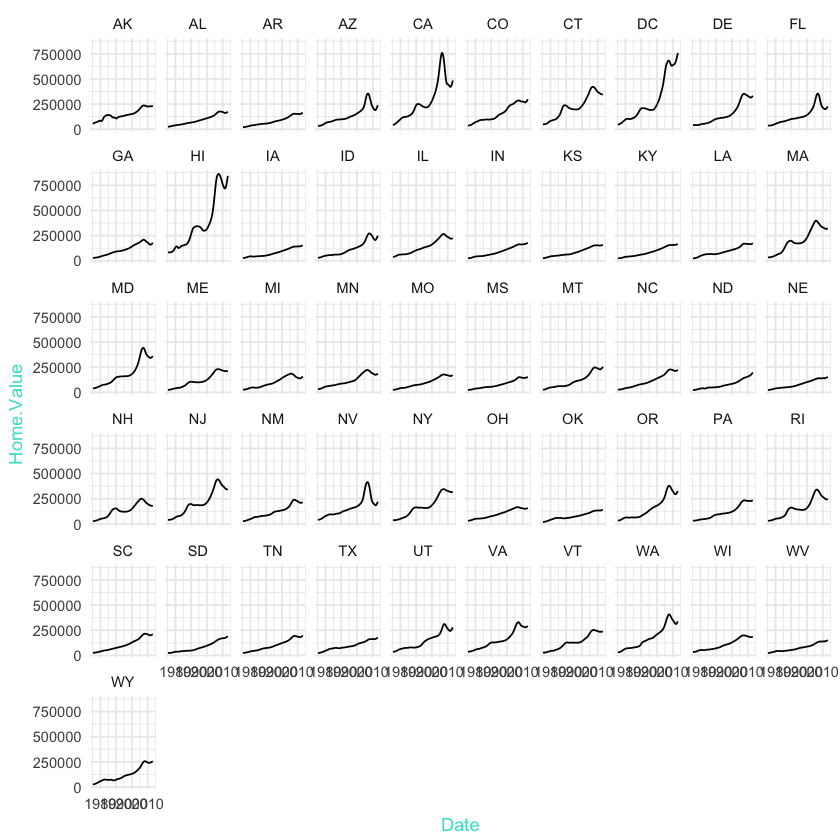

In [29]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))